In [2]:
# import the necessary pacakges

import pandas as pd
from pandas import Series, DataFrame 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
!pip install pandas-datareader

In [4]:
# from pandas.io.data import DataReader

In [5]:
from pandas_datareader import data as pdr, wb

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [9]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [10]:
!pip install yfinance

In [11]:
import yfinance as yf
yf.pdr_override()
    
lt = []
for stock in tech_list:
    #globals()[stock] = data.DataReader(stock, 'yahoo', start, end)
    temp_df = pdr.get_data_yahoo(stock, start, end)
    temp_df = temp_df.reset_index()
    lt.append(temp_df)

df = pd.concat([lt[0], lt[1], lt[2], lt[3]], axis=0)
df = df.reset_index(drop=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  173.039993  175.860001  172.149994  175.639999  174.626511   
1 2021-12-23  175.850006  176.850006  175.270004  176.279999  175.262802   
2 2021-12-27  177.089996  180.419998  177.070007  180.330002  179.289444   
3 2021-12-28  180.160004  181.330002  178.529999  179.289993  178.255447   
4 2021-12-29  179.330002  180.630005  178.139999  179.380005  178.344925   

     Volume  
0  92135300  
1  68356600  
2  74919600  
3  79144300  
4  62348900  


In [12]:
AAPL = lt[0]
GOOG = lt[1]
MSFT = lt[2]
AMZN = lt[3]

In [13]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626511,92135300
1,2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600
2,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
3,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255447,79144300
4,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344925,62348900


In [14]:
AAPL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900
248,2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100
249,2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
250,2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
251,2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85859600


In [15]:
print(GOOG.head())
print('')
print(MSFT.head())
print('')
print(AMZN.head())
print('')


        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  144.100006  147.302994  143.962997  146.949005  146.949005   
1 2021-12-23  147.089493  148.572601  146.950851  147.142502  147.142502   
2 2021-12-27  147.463501  148.426498  147.250000  148.063995  148.063995   
3 2021-12-28  148.374496  148.374496  145.935501  146.447998  146.447998   
4 2021-12-29  146.429504  147.183746  145.504501  146.504501  146.504501   

     Volume  
0  18438000  
1  13818000  
2  13256000  
3  18624000  
4  17022000  

        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  328.299988  333.609985  325.750000  333.200012  330.106842   
1 2021-12-23  332.750000  336.390015  332.730011  334.690002  331.583008   
2 2021-12-27  335.459991  342.480011  335.429993  342.450012  339.270966   
3 2021-12-28  343.149994  343.809998  340.320007  341.250000  338.082123   
4 2021-12-29  341.299988  344.299988  339.679993  341.950012  338.775635   

 

<AxesSubplot:>

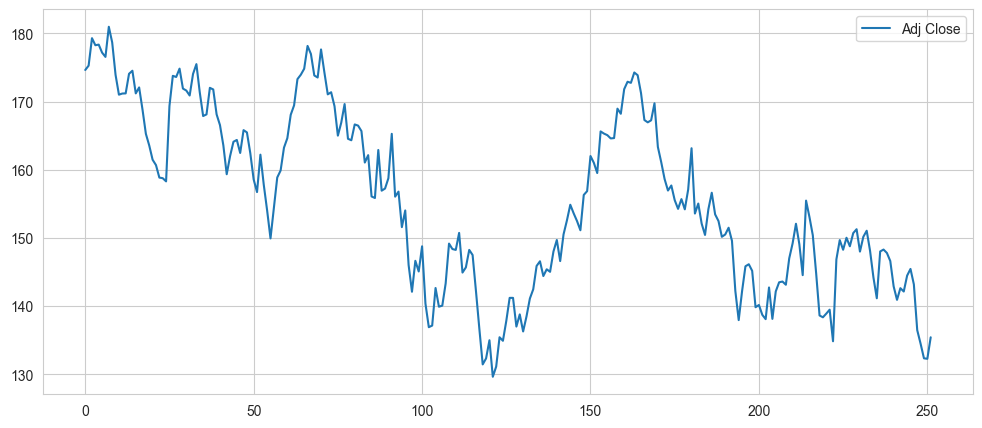

In [16]:
AAPL['Adj Close'].plot(legend = True, figsize = (12,5))

# Q. What are the conclusions that can be drawn from the given graph?

From the chart it can be observed that the trend reverses its pattern every 20-30 day. 
182 was a all time high
128 was the all time low


<AxesSubplot:>

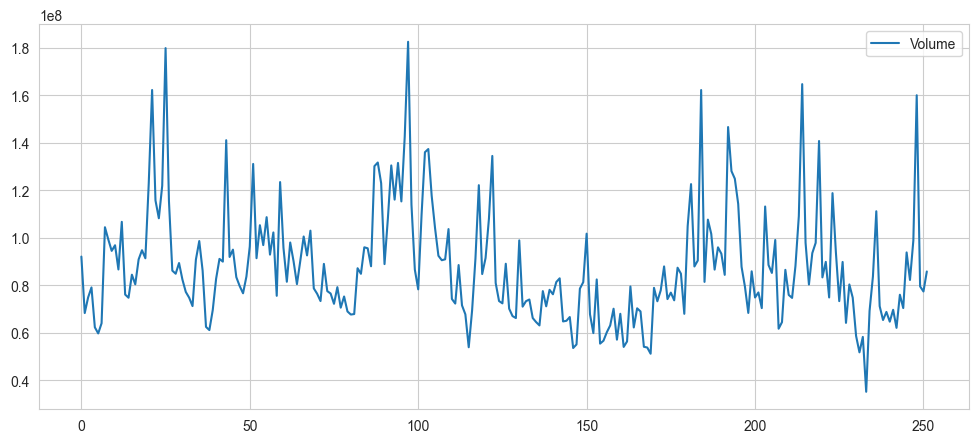

In [17]:
AAPL['Volume'].plot(legend = True, figsize = (12,5))

# Q. What are the conclusions that can be drawn from the given graph?

1.82e8 was the largest volume of all Time
0.2e8 was the lowest volume
in max of the days, the volume was between 0.8e8 and 1.2e8



In [18]:
# Calculating moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:>

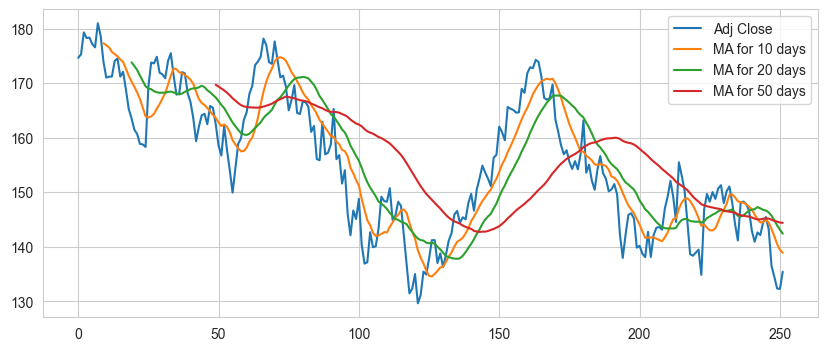

In [19]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

# Q. What are the conclusions that can be drawn from the given graph?

min
adj close - 129
ma for 10 days - 136
ma for 50 days - 142

max
adj close - 182
ma for 10 days - 177
ma for 50 days - 170




<AxesSubplot:>

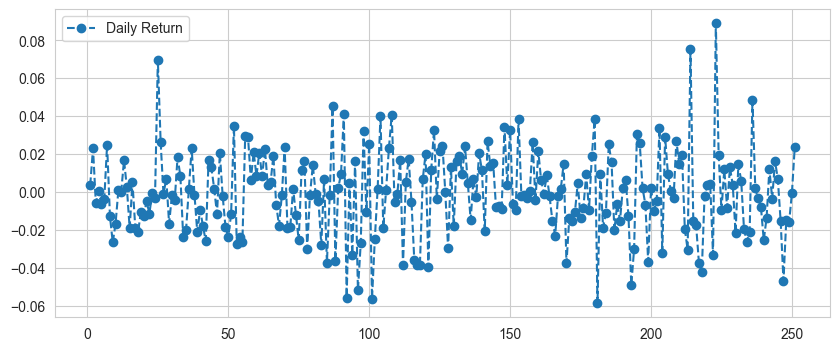

In [20]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

max daily return - 0.09%
min daily return - -0.06%
avg daily return - -0.04% to 0.04%

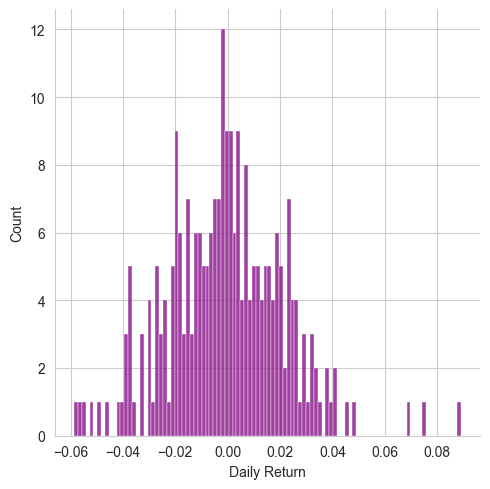

In [21]:
sns.displot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

avg daily return - -0.03% to 0.03%


In [22]:
# Q. Draw the conclusions for the rest 3 companies

<AxesSubplot:>

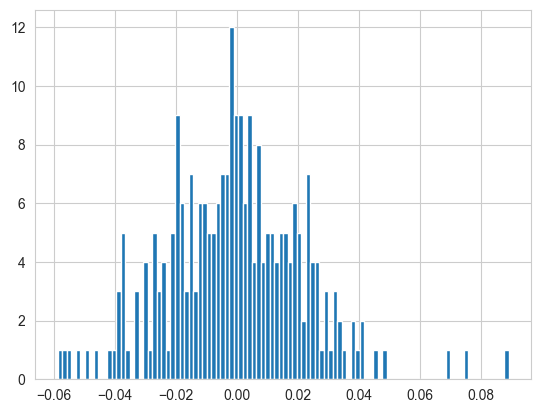

In [23]:
AAPL['Daily Return'].hist(bins=100)

In [24]:
# closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [25]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-12-22,174.626495,171.037003,146.949005,330.106873
2021-12-23,175.262802,171.068497,147.142502,331.583008
2021-12-27,179.289459,169.669495,148.063995,339.270996
2021-12-28,178.255447,170.660995,146.447998,338.082123
2021-12-29,178.344940,169.201004,146.504501,338.775665


In [26]:
tech_rets = closing_df.pct_change()

In [27]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-12-22,NaN,NaN,NaN,NaN
2021-12-23,0.003644,0.000184,0.001317,0.004472
2021-12-27,0.022975,-0.008178,0.006263,0.023186
2021-12-28,-0.005767,0.005844,-0.010914,-0.003504
2021-12-29,0.000502,-0.008555,0.000386,0.002051


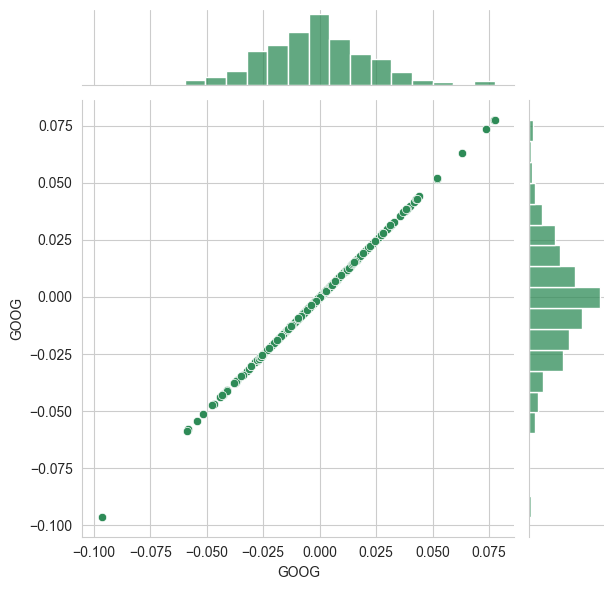

In [29]:
sns.jointplot(data=tech_rets, x='GOOG', y = 'GOOG', kind = 'scatter', color = 'seagreen')

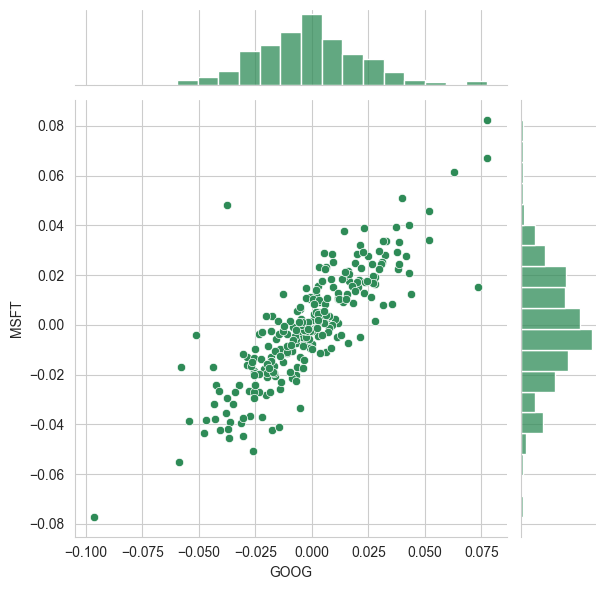

In [30]:
sns.jointplot(data=tech_rets, x='GOOG', y = 'MSFT', kind = 'scatter', color = 'seagreen')

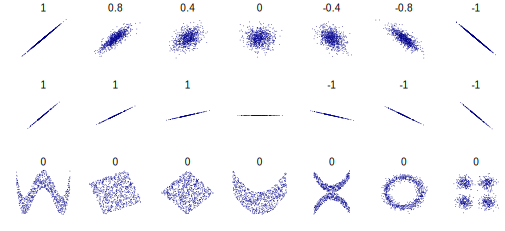

In [36]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

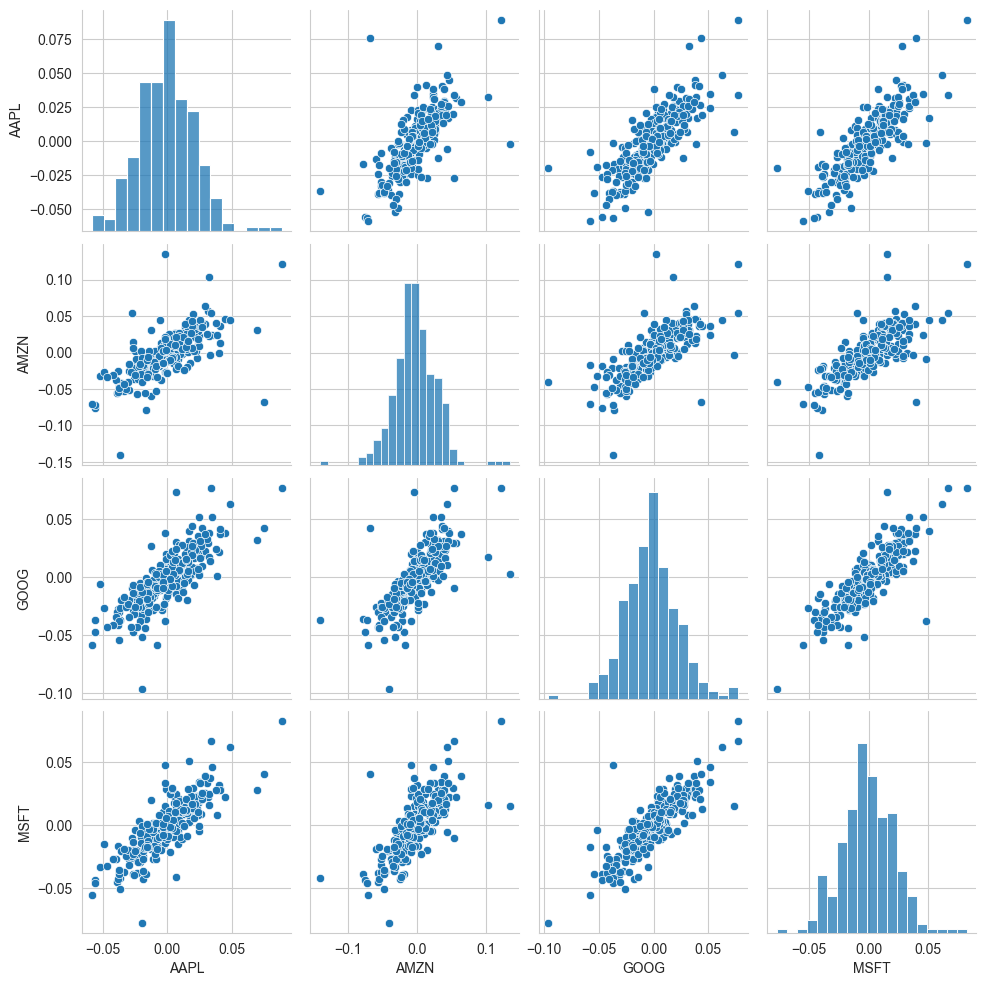

In [32]:
sns.pairplot(tech_rets.dropna())

c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Lo

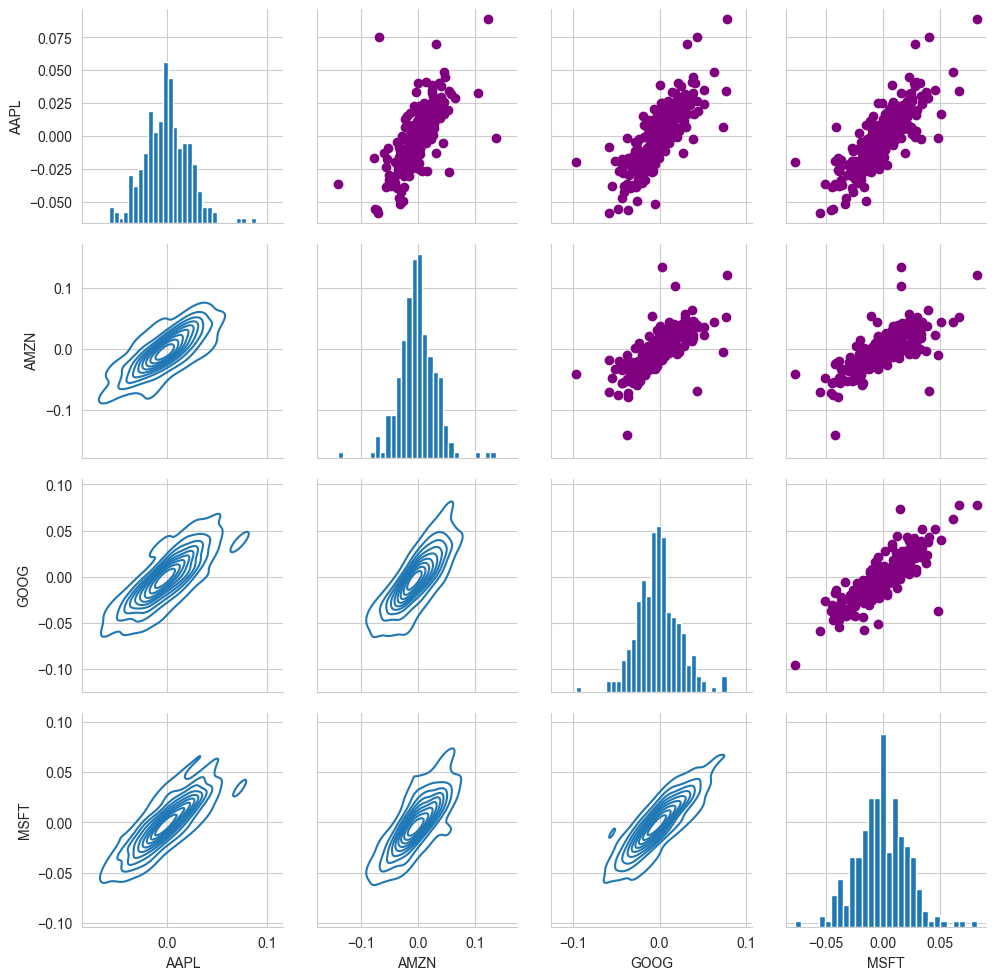

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, c_map = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
c:\Users\shash\AppData\Lo

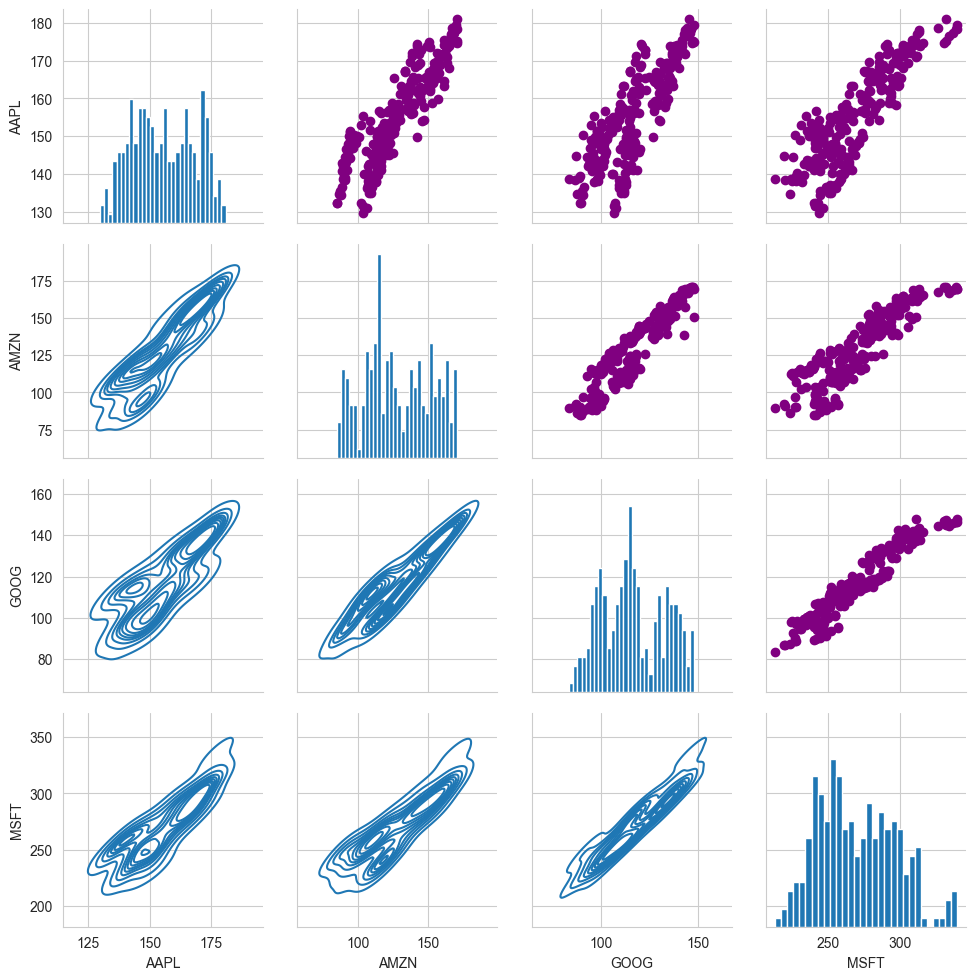

In [39]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, c_map = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)


<AxesSubplot:>

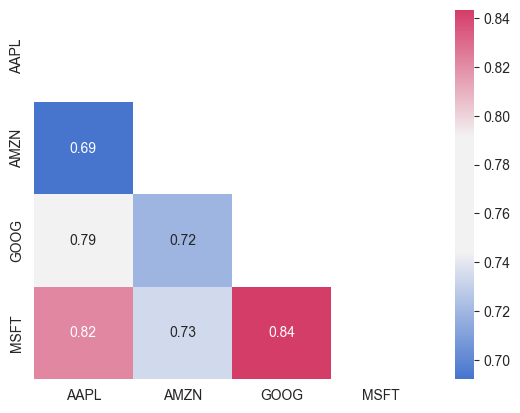

In [43]:
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = sns.diverging_palette(256, 0, sep = 80, n=7, as_cmap=True), annot=True, mask=mask)

<AxesSubplot:>

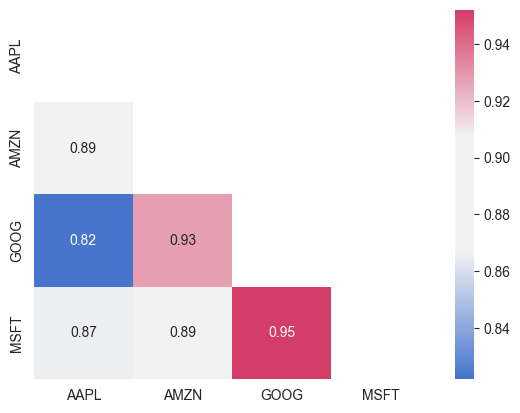

In [44]:
corr = closing_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = sns.diverging_palette(256, 0, sep = 80, n=7, as_cmap=True), annot=True, mask=mask)

In [45]:
rets = tech_rets.dropna()

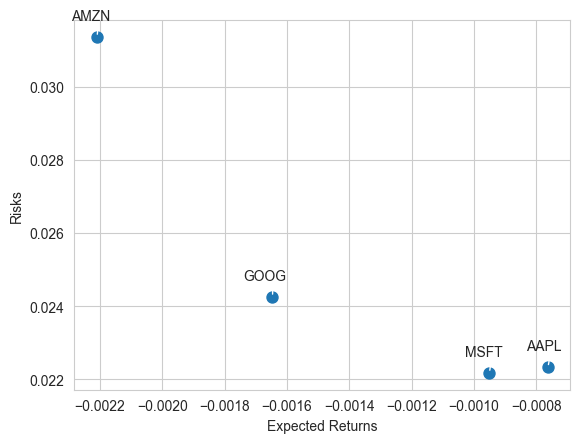

In [51]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risks')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(10,10),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))